In [22]:
import os
import subprocess

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
# this ensures that all C output is redirected to the Jupyter output box
%load_ext wurlitzer

from xspec import *

#Calculate Flux

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [2]:
#Set working directory
os.chdir("/path/to/working/directory")

In [3]:
#Define ObsID
obsids = ['6010080272']


In [14]:
#Run nicerl2 the standard way, extracting data during orbit night
#Run nicerl2 with thresfilter=DAY to get orbit day data
for i in obsids:
    print(f"ObsID:{i}")
    os.system(f"nicerl2 {i} clobber=YES")
    os.system(f"nicerl2 {i} threshfilter=DAY clfile='{i}/xti/event_cl/ni{i}_0mpu7_cl_DAY.evt' clobber=YES")
    

ObsID:6010080272


Both 6010080272/auxil/ni6010080272.mkf and 6010080272/auxil/ni6010080272.mkf.gz exist (defaulting to .gz version) at /Users/jeremy/local/heasoft-6.33/aarch64-apple-darwin23.1.0/bin/nicerl2 line 765.


nicerl2 1.33
--------------------------------------------------------
         Requested task operations: CALMERGE,SCREEN,MKF
       Processed prefilter_columns: NICERV5,-MPU_OVER_COUNT,-MPU_UNDER_COUNT,-MPU_XRAY_COUNT,-MPU_ALL_COUNT
   Processed niprefilter2_coltypes: BASE,NICERV5
          Processed geomag_columns: kp_potsdam.fits(KP),solarphi_oulu.fits(SOLAR_PHI),COR_NYM
  Inputs:
  (INDIR) 6010080272
  (UF)    6010080272/xti/event_uf
  (CL)    6010080272/xti/event_cl
  (MKF)   6010080272/auxil/ni6010080272.mkf

                        MPU List: 0-6
                          OBS_ID: 6010080272
                          OBJECT: Cas_A
                        Position: RA   350.8542  Dec    58.8103 [deg] OBJECT
                                  RA   350.8531  Dec    58.8100 [deg] NOMINAL
                                  RA        OBJ  Dec        OBJ [deg] REQUESTED

  CALDBVER = xti20240206
  SOFTVER  = Hea_19Apr2024_V6.33.2_NICER_2024-02-09_V012A

========== Running nicercal ========

Both 6010080272/auxil/ni6010080272.mkf and 6010080272/auxil/ni6010080272.mkf.gz exist (defaulting to .gz version) at /Users/jeremy/local/heasoft-6.33/aarch64-apple-darwin23.1.0/bin/nicerl2 line 765.


nimaketime 1.13
        Tracking?: REQUIRED
        On Target: < 54 [arcsec]
        Elevation: < 15 [deg]
     Bright Earth: < 30 [deg]
   Number of FPMs: > 7
Star tracker good: REQUIRED
  TOT_LOWMEM_FIFO: SKIP
   DELTA_SLOW_LLD: SKIP
        NICER_SAA: SCREEN OUT
              SAA: SKIP
          COR_SAX: *-*
  UNDERONLY Range: 0-500
   OVERONLY Range: *-30
   Running maketime

                 Summary of Temporal Filtering
       Successive Filtering Stage     GoodTime #GTI
   ------------------------------   ---------- ----
            On-Target + Observing      4788.00    6  
                SAA + COR + Orbit      4788.00    6  
                      Undershoots      4779.00    6  
                       Overshoots      4779.00    6  
                     Filtered GTI      4779.00    6  
========== Running nicermergeclean ==========
nicermergeclean 1.12
niautoscreen 1.3
   FPM exposure check
   FPM round-robbin check
   Under(only)shoot check
   Over(only)shoot check
   Noise rate

In [15]:
#Run nicerl3-spect separately for orbit day and night
for i in obsids:
    os.system(f'nicerl3-spect {i}  mkfile=./{i}/auxil/ni{i}.mkf clfile=./{i}/xti/event_cl/ni{i}_0mpu7_cl.evt bkgmodeltype=scorpeon suffix=_night outlang=PYTHON clobber=YES')
    os.system(f'nicerl3-spect {i}  mkfile=./{i}/auxil/ni{i}.mkf clfile=./{i}/xti/event_cl/ni{i}_0mpu7_cl_DAY.evt bkgmodeltype=scorpeon suffix=_day outlang=PYTHON clobber=YES')

nicerl3-spect 1.10
--------------------------------------------------------
   RA: 350.8542   Dec: 58.81028   [deg; J2000]
   Create PHA ./6010080272/xti/event_cl/ni6010080272mpu7_sr_night.pha
     EXPOSURE: 1905
   Create Target ARF ./6010080272/xti/event_cl/ni6010080272mpu7_night.arf
   Create Sky ARF ./6010080272/xti/event_cl/ni6010080272mpu7_sk_night.arf
   Create RMF ./6010080272/xti/event_cl/ni6010080272mpu7_night.rmf


   information but filter file does not.
   No threshold-dependent corrections will be applied.


   (updating GROUPING column of phafile)
   Create Background
     SCORPEON model ./6010080272/xti/event_cl/ni6010080272mpu7_bg_night.py
     Create background script ./6010080272/xti/event_cl/ni6010080272mpu7_bg_night.py (SCORPEON)
   Create Load file ./6010080272/xti/event_cl/ni6010080272mpu7_load_night.py
   XSPEC plot(s) SKIPPED because outlang=python

To use these products within pyXspec, type:
from xspec import *
exec(open('./6010080272/xti/event_cl/ni6010080272mpu7_load_night.py').read())
--------------------------------------------------------
DONE
nicerl3-spect 1.10
--------------------------------------------------------
   RA: 350.8542   Dec: 58.81028   [deg; J2000]
   Create PHA ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_sr_day.pha
     EXPOSURE: 4779
   Create Target ARF ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_day.arf
   Create Sky ARF ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_sk_day.arf
   Create RMF ./6010080272/xti/event_cl/ni6010080272_cl_DAYmp

   information but filter file does not.
   No threshold-dependent corrections will be applied.


   (updating GROUPING column of phafile)
   Create Background
     SCORPEON model ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_bg_day.py
     Create background script ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_bg_day.py (SCORPEON)
   Create Load file ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_load_day.py
   XSPEC plot(s) SKIPPED because outlang=python

To use these products within pyXspec, type:
from xspec import *
exec(open('./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_load_day.py').read())
--------------------------------------------------------
DONE


In [4]:
#Load in orbit night spectrum
exec(open(f'{obsids[0]}/xti/event_cl/ni{obsids[0]}mpu7_load_night.py').read())


1 spectrum  in use
 
Spectral Data File: ./6010080272/xti/event_cl/ni6010080272mpu7_sr_night.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.808e+02 +/- 1.490e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-178
  Telescope: NICER Instrument: XTI  Channel Type: PI
  Exposure Time: 1905 sec
 Using fit statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.


***Xspec Error: Invalid ignore/notice string: 1:bad



Response successfully loaded.
Arf successfully loaded.
Response successfully loaded.

Model nxb:niscorpv23_nxb<1> + niscorpv23_noise<2> Source No.: 99   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   niscorpv23_nxbthresh_offset         1.00000      +/-  0.0          
   2    1   niscorpv23_nxbbatch1_frac         1.00000      +/-  0.0          
   3    1   niscorpv23_nxbcon_norm            1.00000      +/-  0.0          
   4    1   niscorpv23_nxbcor_norm            1.00000      +/-  0.0          
   5    1   niscorpv23_nxbtrel_norm           1.00000      +/-  0.0          
   6    1   niscorpv23_nxbleel_norm           1.00000      +/-  0.0          
   7    1   niscorpv23_nxbprel_norm           1.00000      +/-  0.0          
   8    1   niscorpv23_nxbsaa_norm            1.00000      +/-  0.0          
   9    1   niscorpv23_nxbnorm                1.00000      +/-  0.0          
  10    2   niscorpv23_noisenoise_ecent         1.00000      +/-  0.0   


Fit statistic  : Chi-Squared                224337.5     using 178 bins.

Test statistic : Chi-Squared                224337.5     using 178 bins.
 Null hypothesis probability of 0.0e+00 with 165 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                226702.4     using 178 bins.

Test statistic : Chi-Squared                226702.4     using 178 bins.
 Null hypothesis probability of 0.0e+00 with 165 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                226702.4     using 178 bins.

Test statistic : Chi-Squared                226702.4     using 178 bins.
 Null hypothesis probability of 0.0e+00 with 166 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                226691.0     using 178 bins.

Test statistic : Chi-Squared                226691.0     using 178 bins.
 Null hypothesis probability of 0.0e+00 with 167 degrees of freedom
 Current data and model n

In [5]:
#Set energy range and abundances
AllData.ignore("0.0-0.22")
AllData.ignore("15.0-**")
Xset.abund ="wilm"

     1 channels (1) ignored in spectrum #     1

Fit statistic  : Chi-Squared                226702.6     using 177 bins.

Test statistic : Chi-Squared                226702.6     using 177 bins.
 Null hypothesis probability of 0.0e+00 with 171 degrees of freedom
 Current data and model not fit yet.

     1 channels (178) ignored in spectrum #     1

Fit statistic  : Chi-Squared                226702.3     using 176 bins.

Test statistic : Chi-Squared                226702.3     using 176 bins.
 Null hypothesis probability of 0.0e+00 with 170 degrees of freedom
 Current data and model not fit yet.

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).

Fit statistic  : Chi-Squared                226704.8     using 176 bins.

Test statistic : Chi-Squared                226704.8     using 176 bins.
 Null hypothesis probability of 0.0e+00 with 170 degrees of freedom
 Current dat

In [6]:
#Prep for plotting
Plot.device = "/null"
Plot.xAxis="kev"
Plot("ldata")

***Warning: Fit is not current.


In [7]:
#Define values to be plotted
energies_sco = Plot.x(plotGroup=1)
edeltas_sco = Plot.xErr(plotGroup=1)
rates_sco = Plot.y(plotGroup=1)
errors_sco = Plot.yErr(plotGroup=1)
labels_sco = Plot.labels()
sco_model_sco = Plot.model()

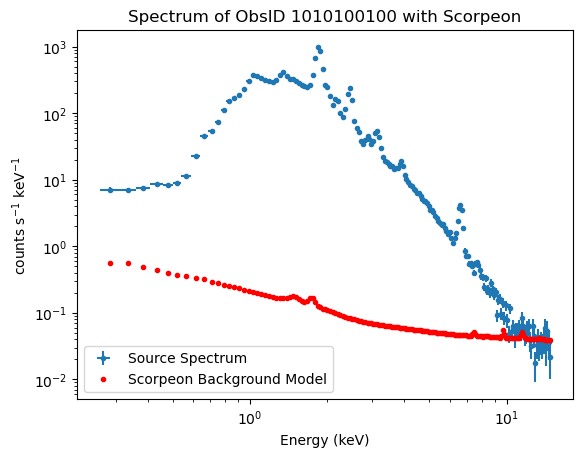

In [8]:
#Plot spectrum and Scorpeon background model
plt.yscale('log')
plt.xscale('log')
plt.xlabel(labels_sco[0])
plt.ylabel(labels_sco[1])
plt.title("Spectrum of ObsID 1010100100 with Scorpeon")
plt.errorbar(energies_sco,rates_sco,xerr=edeltas_sco,yerr=errors_sco,fmt='.', label='Source Spectrum')
plt.errorbar(energies_sco,sco_model_sco,fmt='.',color='red',label='Scorpeon Background Model')
plt.legend()
plt.show()

In [9]:
#Load in orbit day spectrum
exec(open(f'{obsids[0]}/xti/event_cl/ni{obsids[0]}_cl_DAYmpu7_load_day.py').read())



Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: ./6010080272/xti/event_cl/ni6010080272_cl_DAYmpu7_sr_day.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.822e+02 +/- 1.423e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-188
  Telescope: NICER Instrument: XTI  Channel Type: PI
  Exposure Time: 4779 sec
 Using fit statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.

Response successfully loaded.
Arf successfully loaded.


***Xspec Error: Invalid ignore/notice string: 1:bad


An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type already exists.
  Nothing will be done.
An mdefine model with this name, expression, and type alread

In [10]:
#Set energy range and abundances
AllData.ignore("0.0-0.22")
AllData.ignore("15.0-**")
Xset.abund ="wilm"

     1 channels (1) ignored in spectrum #     1

Fit statistic  : Chi-Squared                296967.7     using 187 bins.

Test statistic : Chi-Squared                296967.7     using 187 bins.
 Null hypothesis probability of 0.0e+00 with 180 degrees of freedom
 Current data and model not fit yet.

     1 channels (188) ignored in spectrum #     1

Fit statistic  : Chi-Squared                296967.5     using 186 bins.

Test statistic : Chi-Squared                296967.5     using 186 bins.
 Null hypothesis probability of 0.0e+00 with 179 degrees of freedom
 Current data and model not fit yet.

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).

Fit statistic  : Chi-Squared                296967.5     using 186 bins.

Test statistic : Chi-Squared                296967.5     using 186 bins.
 Null hypothesis probability of 0.0e+00 with 179 degrees of freedom
 Current dat

In [11]:
#Prep for plotting
Plot.device = "/null" 
Plot.xAxis="kev"
Plot("ldata")

***Warning: Fit is not current.


In [12]:
#Define values to be plotted
energies_sco_day = Plot.x(plotGroup=1)
edeltas_sco_day = Plot.xErr(plotGroup=1)
rates_sco_day = Plot.y(plotGroup=1)
errors_sco_day = Plot.yErr(plotGroup=1)
labels_sco_day = Plot.labels()
sco_model_sco_day = Plot.model()

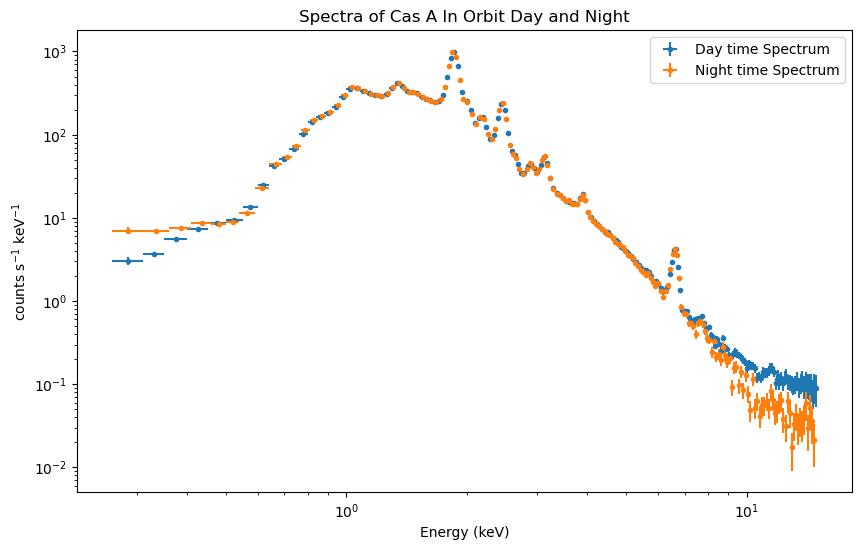

In [21]:
#Plot showing orbit day versus night spectra of Cas A, note the change in threshold at low energies
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(labels_sco_day[0])
plt.ylabel(labels_sco_day[1])
plt.title("Spectra of Cas A In Orbit Day and Night")
plt.errorbar(energies_sco_day,rates_sco_day,xerr=edeltas_sco_day,yerr=errors_sco_day,fmt='.', label='Day time Spectrum')
#plt.errorbar(energies_sco_day,sco_model_sco_day,fmt='.',color='red',label='Scorpeon Background Model')
plt.errorbar(energies_sco,rates_sco,xerr=edeltas_sco,yerr=errors_sco,fmt='.', label = 'Night time Spectrum')
plt.legend()
plt.show()